In [36]:
#import data manipulation libraries
import pandas as pd
import numpy as np

#import data visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#import filter warning libraries
import warnings
warnings.filterwarnings('ignore')

#Import loggings
import logging
logging.basicConfig(level = logging.INFO,
                    format = '%(asctime)s - %(levelname)s - %(message)s',
                    filemode = 'w',
                    filename = 'model.log', force = True)

#Import Sci-kit Learn Libraries for model building
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler #overfit,outlier,imbalance data-robust(imblearn)
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [37]:
url = 'https://raw.githubusercontent.com/anirudhakolay/Life_Expectancy_Analysis/refs/heads/main/Life%20Expectancy%20Data.csv'
df = pd.read_csv(url)
df.sample(frac = 1) 

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
845,Equatorial Guinea,2004,Developing,54.1,336.0,3,6.28,44.547683,NaN,38,...,48.0,2.40,38.0,4.4,685.348970,724817.0,1.0,1.0,0.553,8.5
1178,Iceland,2007,Developed,81.3,59.0,0,7.53,12042.973660,NaN,0,...,97.0,8.75,97.0,0.1,68348.318170,311566.0,0.9,0.9,0.887,18.2
2604,Timor-Leste,2012,Developing,67.4,159.0,2,0.01,30.179985,83.0,16,...,83.0,1.10,83.0,0.1,1117.777240,115676.0,11.2,11.3,0.618,12.5
2130,Romania,2004,Developed,71.7,165.0,4,9.82,431.325037,99.0,117,...,97.0,5.43,97.0,0.1,3552.924520,21451748.0,3.4,3.9,0.733,12.9
1641,Malta,2008,Developed,80.0,64.0,0,7.14,2655.573684,86.0,1,...,72.0,8.15,72.0,0.1,21928.767000,49379.0,0.7,0.7,0.813,14.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1406,Kuwait,2003,Developing,73.4,93.0,0,0.03,159.009873,99.0,0,...,99.0,3.23,99.0,0.1,2271.569610,NaN,3.2,3.0,0.788,14.1
2495,Swaziland,2009,Developing,52.6,46.0,3,4.90,47.616452,88.0,26,...,89.0,8.46,88.0,33.7,332.517125,118675.0,5.8,5.9,0.519,10.8
662,Cuba,2010,Developing,78.0,98.0,1,4.13,787.280816,96.0,0,...,99.0,1.19,96.0,0.1,5676.141430,NaN,3.4,3.2,0.784,17.6
1719,Mongolia,2012,Developing,67.8,231.0,1,0.01,253.828586,99.0,0,...,99.0,4.22,99.0,0.1,4368.822480,2814226.0,2.2,2.3,0.712,14.7


In [38]:
#Checking dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

<Axes: >

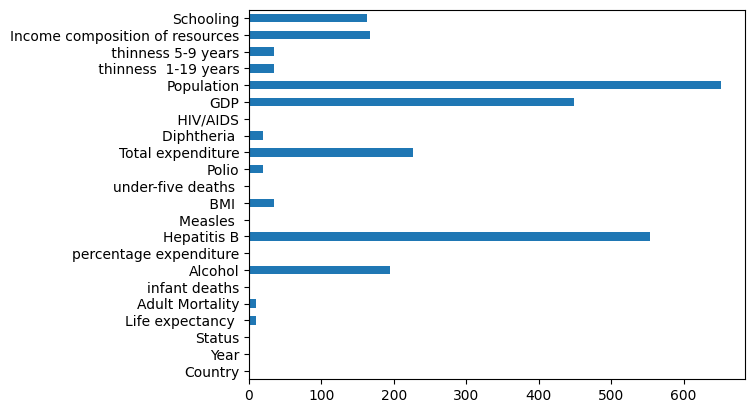

In [39]:
#Checking Null Values stats using Graphical method
df.isnull().sum().plot(kind = 'barh')

In [40]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [41]:
#Evaluate Descriptive stats: EDA

# Step 1: Sagregate Categorical columns nd Numerical
categorical_col = df.select_dtypes(include = 'object')
numerical_col = df.select_dtypes(include = ['int64','float64']) #or exclude = 'object'

In [42]:
# Exploratory Data Analysis
# Univariate Analysis

stats = []

from collections import OrderedDict

for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Feauture' : i,
        'Count' : df[i].count(),
        'Mean' : df[i].mean(),
        'Median' : df[i].median(),
        'Mode' : df[i].mode()[0],
        'Minimum' : df[i].min(),
        'Maximum' : df[i].max(),
        'Q1' : df[i].quantile(0.25),
        'Q3' : df[i].quantile(0.75),
        'IQR' : df[i].quantile(0.75) - df[i].quantile(0.25), #IQR cannot be 0
        'Std' : df[i].std(),
        'skewness' : df[i].skew(), #positive skewness (right skew), negative skewness (left skew), and zero skewness (symmetrical distribution, i.e. normal data)
        'kurtosis' : df[i].kurtosis(), # mesokurtic, leptokurtic, and platykurtic.
        'Variance' : df[i].var(), #spread of data
        'Standard Deviation' : df[i].std() # distance between mean and data point, under root variance
    })

    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Feauture,Count,Mean,Median,Mode,Minimum,Maximum,Q1,Q3,IQR,Std,skewness,kurtosis,Variance,Standard Deviation
0,Year,2938,2.007519e+03,2.008000e+03,2013.00000,2000.00000,2.015000e+03,2004.000000,2.012000e+03,8.000000e+00,4.613841e+00,-0.006409,-1.213722,2.128753e+01,4.613841e+00
1,Life expectancy,2928,6.922493e+01,7.210000e+01,73.00000,36.30000,8.900000e+01,63.100000,7.570000e+01,1.260000e+01,9.523867e+00,-0.638605,-0.234477,9.070405e+01,9.523867e+00
2,Adult Mortality,2928,1.647964e+02,1.440000e+02,12.00000,1.00000,7.230000e+02,74.000000,2.280000e+02,1.540000e+02,1.242921e+02,1.174369,1.748860,1.544852e+04,1.242921e+02
3,infant deaths,2938,3.030395e+01,3.000000e+00,0.00000,0.00000,1.800000e+03,0.000000,2.200000e+01,2.200000e+01,1.179265e+02,9.786963,116.042756,1.390666e+04,1.179265e+02
4,Alcohol,2744,4.602861e+00,3.755000e+00,0.01000,0.01000,1.787000e+01,0.877500,7.702500e+00,6.825000e+00,4.052413e+00,0.589563,-0.802909,1.642205e+01,4.052413e+00
5,percentage expenditure,2938,7.382513e+02,6.491291e+01,0.00000,0.00000,1.947991e+04,4.685343,4.415341e+02,4.368488e+02,1.987915e+03,4.652051,26.573387,3.951805e+06,1.987915e+03
6,Hepatitis B,2385,8.094046e+01,9.200000e+01,99.00000,1.00000,9.900000e+01,77.000000,9.700000e+01,2.000000e+01,2.507002e+01,-1.930845,2.770259,6.285057e+02,2.507002e+01
7,Measles,2938,2.419592e+03,1.700000e+01,0.00000,0.00000,2.121830e+05,0.000000,3.602500e+02,3.602500e+02,1.146727e+04,9.441332,114.859903,1.314983e+08,1.146727e+04
8,BMI,2904,3.832125e+01,4.350000e+01,58.50000,1.00000,8.730000e+01,19.300000,5.620000e+01,3.690000e+01,2.004403e+01,-0.219312,-1.291095,4.017633e+02,2.004403e+01
9,under-five deaths,2938,4.203574e+01,4.000000e+00,0.00000,0.00000,2.500000e+03,0.000000,2.800000e+01,2.800000e+01,1.604455e+02,9.495065,109.752795,2.574277e+04,1.604455e+02


In [43]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [44]:
# Imputng missing values
#Impute with median when data is skewed
# df['Schooling'].fillna(df['Schooling'].median(), inplace = True)
# df['Income composition of resources'].fillna(df['Income composition of resources'].median(), inplace = True)
# df[' thinness 5-9 years'].fillna(df[' thinness 5-9 years'].median(), inplace = True)
# df[' thinness  1-19 years'].fillna(df[' thinness  1-19 years'].median(), inplace = True)  
# df[' HIV/AIDS'].fillna(df[' HIV/AIDS'].median(), inplace = True)
# df['Adult Mortality'].fillna(df['Adult Mortality'].median(), inplace = True)
# df['infant deaths'].fillna(df['infant deaths'].median(), inplace = True)
# df['GDP'].fillna(df['GDP'].median(), inplace = True)
# df['Diphtheria '].fillna(df['Diphtheria '].median(), inplace = True)
# df['BMI'].fillna(df['BMI'].median(), inplace = True)
# df['Polio'].fillna(df['Polio'].median(), inplace = True)
# df['Alcohol'].fillna(df['Alcohol'].median(), inplace = True) 

from sklearn.impute import SimpleImputer

for i in numerical_col.columns:
    sc = SimpleImputer(strategy='median')
    df[i] = sc.fit_transform(df[[i]])

In [45]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [46]:
from sklearn.impute import SimpleImputer

for i in categorical_col.columns:
    sc = SimpleImputer(strategy='most_frequent')
    df[i] = sc.fit_transform(df[[i]]).ravel()

In [47]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015.0,Developing,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014.0,Developing,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013.0,Developing,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012.0,Developing,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011.0,Developing,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [48]:
# Use Label Encoding
from sklearn.preprocessing import LabelEncoder
for i in categorical_col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

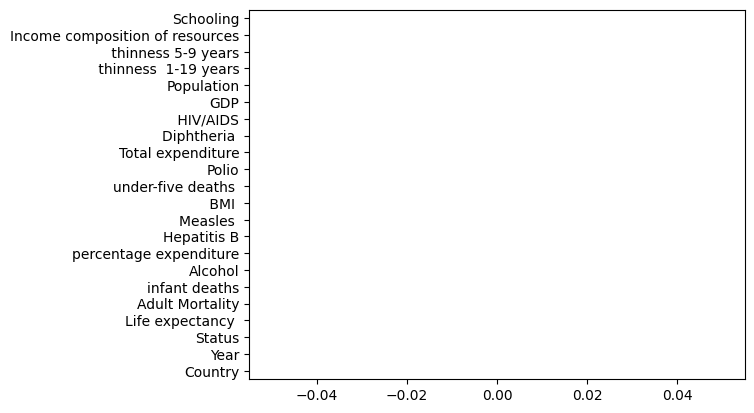

In [49]:
df.isnull().sum().plot(kind= 'barh')
plt.show()

In [50]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015.0,1,65.0,263.0,62.0,0.01,71.279624,65.0,1154.0,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014.0,1,59.9,271.0,64.0,0.01,73.523582,62.0,492.0,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013.0,1,59.9,268.0,66.0,0.01,73.219243,64.0,430.0,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012.0,1,59.5,272.0,69.0,0.01,78.184215,67.0,2787.0,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011.0,1,59.2,275.0,71.0,0.01,7.097109,68.0,3013.0,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [51]:
# Use Label Encoding
from sklearn.preprocessing import LabelEncoder
for i in categorical_col:
    le = LabelEncoder()
    df[i] = le.fit_transform(df[i])

In [53]:
# Preventing Data Leakage

# Step 01: Split the dataset in X and y
# Where X: Independent Column and y: Dependent Column : Target column
X = df.drop(columns = ['Country','Life expectancy '],axis = 1)
y = df['Life expectancy '] # target column
# Step 02: Split the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
# Step 03: Scale the data
scaler = RobustScaler() 
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [54]:
from sklearn.ensemble import RandomForestRegressor

RF = RandomForestRegressor().fit(X_train,y_train)
y_pred_RF = RF.predict(X_test)

RF.score(X_train,y_train)

0.994047285515328